<a href="https://colab.research.google.com/github/cs17emds11029/googlecolab/blob/master/Pytorch_Learning_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Now we understand how the Nueral network architecture is laid out in Pytorch, we would use this notebook to train an image classification network.

In [0]:
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

import torch
import torchvision
import torchvision.transforms as transforms

'torchvision' is a package that is created to help with loading and transforming images as numpy arrays. The boilerplate coding is encapsulated in torchvision like what OpenCV provides.

In [0]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
# this line is used to transform the image data that is in range [0,1] to [-1,1]

In [4]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset  = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader  = torch.utils.data.DataLoader(testset,  batch_size=4, shuffle=True, num_workers=2)
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
  img = img/2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

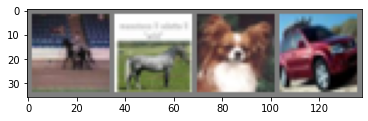

horse horse   dog   car


In [6]:
dataiter = iter(trainloader)
image,labels = dataiter.next()
imshow(torchvision.utils.make_grid(image))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

Until now, we have setup code that will load one of the datasets available for training in pytorch. In normal scenarios, you would define this code of loading all the images to memory (if it fits) and then defining the batch size, inspecting the images etc. An image is a 3 channel RGB bitmap that can be loaded as numpy array.

In [0]:
# Now we write the Pytorch code for nueral network
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool  = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
  
  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x


In [0]:
net = Net()

In [0]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Now we define the main training loop after defining all that is required. Remember the main training loop consists of iterating through the entire train data set multiple times and performing zero grad, forward, loss, backward, step in that order be it SGD or something else 

In [15]:
for epoch in range(2):
  running_loss = 0.0
  for i,data in enumerate(trainloader,0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i%2000 == 1999:
      print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0

print('Finished training!')    


[1,  2000] loss: 2.148
[1,  4000] loss: 1.798
[1,  6000] loss: 1.648
[1,  8000] loss: 1.552
[1, 10000] loss: 1.517
[1, 12000] loss: 1.436
[2,  2000] loss: 1.371
[2,  4000] loss: 1.352
[2,  6000] loss: 1.337
[2,  8000] loss: 1.315
[2, 10000] loss: 1.294
[2, 12000] loss: 1.265
Finished training!


In [0]:
PATH = "./cifar_net_path"
torch.save(net.state_dict(),PATH)

In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

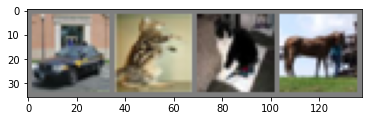

GroundTruth:    car   cat   cat horse


In [19]:
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [20]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [0]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

In [23]:
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  truck  bird   dog horse


In [24]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %
